In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getRandom():
    while True:
        x = 2*random.random()-1
        y = 2*random.random()-1
        z = random.random()
        r = np.sqrt(x**2+y**2+z**2)
        if r < 1:
            return np.arccos(z/r),np.arctan(y/x) #theta,phi

In [8]:
def mf(th):
    return th/2+1/4*np.sin(2*th)
def A(th,phi,h):
    a = l-h*abs(np.sin(phi))*np.tan(th)
    b = w-h*abs(np.cos(phi))*np.tan(th)
    if a > 0 and b > 0:
        return a*b
    return 0

In [9]:
h1 = np.array([99.5,85.0,76.0,66.0,56.5,47.5,37.5])/100
h = [h1[0]-h1[i+1] for i in range(5)]
w= 0.325
l = 0.82
eff = [1,0.962,0.961,0.916,0.95]
print(h)

[0.14500000000000002, 0.23499999999999999, 0.33499999999999996, 0.43000000000000005, 0.52000000000000002]


In [10]:
rates = [0,0,0,0,0]
for i in range(1000000):
    th,phi = getRandom()
    for j in range(5):
        rates[j] += mf(th)*A(th,phi,h[j])*eff[j]
print(rates)
rates = rates/rates[0]
print(rates)


[57540.312130005645, 33697.602236608873, 20885.786099119337, 13337.779447762667, 9828.8097675676763]
[ 1.          0.58563468  0.36297659  0.23179887  0.17081607]


[ 1.          0.58563468  0.36297659  0.23179887  0.17081607]


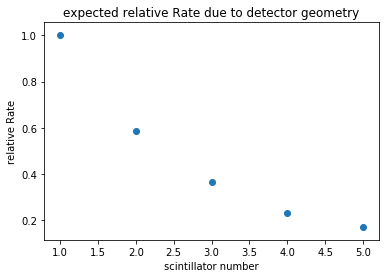

In [11]:
plt.scatter([1,2,3,4,5],rates)
plt.title("expected relative Rate due to detector geometry")
plt.xlabel("scintillator number")
plt.ylabel("relative Rate")
plt.savefig('figures/relativeRate.pdf',format='pdf')
print(rates)

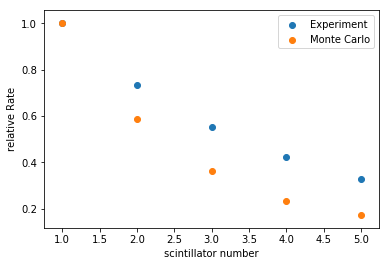

In [28]:
nstop = np.array([687990+476842+336548+248892+855351,476842+336548+248892+855351,336548+248892+855351,248892+855351,855351])/(687990+476842+336548+248892+855351)
plt.scatter([1,2,3,4,5],nstop,label="Experiment")
plt.scatter([1,2,3,4,5],rates,label="Monte Carlo")
plt.xlabel("scintillator number")
plt.ylabel("relative Rate")
plt.legend()
plt.savefig('figures/relativeRate_exp.pdf',format='pdf')



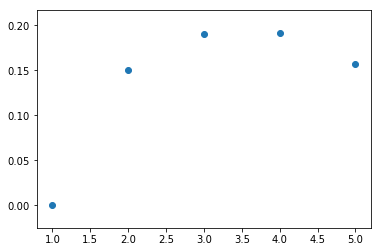

In [27]:
plt.scatter([1,2,3,4,5],nstop-rates,label="Experiment")
